### TPC Benchmarking  
Results Plotting  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 1.0})

import config

In [2]:
fpb = "/home/colin/data/tpc_logs/"

In [3]:
test = "TPC-H"
scale_factor = "100"

In [22]:
# H 100GB Scale Factor Queries
fps = ["bq_h_query_times-100GB-h_100GB_01-default-2020-05-01 09:54:14.099669.csv",
       "bq_h_query_times-100GB-h_100GB_02-partition by time-2020-05-01 23:23:17.050195.csv",
       "bq_h_query_times-100GB-h_100GB_03-partition by time & int range-2020-05-01 23:48:05.744723.csv",
       "bq_h_query_times-100GB-h_100GB_04-cluster & partition by time & int range-2020-05-02 00:12:02.612155.csv",
       "sf_h_query_times-h_100GB_01-default_A-20200503-222731.csv",
       "sf_h_query_times-h_100GB_01-default_B-20200504-060728.csv",
       "sf_h_query_times-h_100GB_01-default_C-20200504-062614.csv",
       "sf_h_query_times-h_100GB_01-default_D-manual.csv"
      ]

In [23]:
if "query" in fps[0]:
    x_type = "query_n"
else:
    x_type = "stream_p"

In [24]:
def ts_converter(t_str):
    try:
        float(t_str)
        return pd.to_datetime(datetime.fromtimestamp(t_str))
    except:
        return pd.to_datetime(t_str)

In [25]:
def parse(fp, x_type):
    x_type = {"q":"query_n", "s":"stream_p"}[x_type]
    df = pd.read_csv(fp)
    #df.t0 = pd.to_datetime(df.t0)
    #df.t1 = pd.to_datetime(df.t1)
    df.t0 = df.t0.apply(ts_converter)
    df.t1 = df.t1.apply(ts_converter)
    df["dt"] = df.t1 - df.t0
    df["dt_s"] = df.dt.dt.total_seconds()
    return df

In [26]:
df = pd.DataFrame(None)
for _fp in fps:
    _df = parse(fpb + _fp, "q")
    df = pd.concat([df, _df])

In [27]:
df = df.sort_values(by="bq_dataset")

In [28]:
df["description"] = df.db + "_" + df.desc

In [29]:
df[df.db == "sf"].head()

,db,test,scale,bq_dataset,desc,query_n,t0,t1,bytes_processed,bytes_billed,dt,dt_s,query_plan,cost,description
9,sf,h,100,h_100GB_01,01 default B,10,2020-05-04 06:06:36.127713,2020-05-04 06:06:42.675496,-1,NaN,00:00:06.547783,6.547783,NaN,0.003667,sf_01 default B
8,sf,h,100,h_100GB_01,01 default B,9,2020-05-04 06:06:24.455642,2020-05-04 06:06:36.117559,-1,NaN,00:00:11.661917,11.661917,NaN,0.006531,sf_01 default B
7,sf,h,100,h_100GB_01,01 default B,8,2020-05-04 06:06:20.570056,2020-05-04 06:06:24.448250,-1,NaN,00:00:03.878194,3.878194,NaN,0.002172,sf_01 default B
6,sf,h,100,h_100GB_01,01 default B,7,2020-05-04 06:06:12.401466,2020-05-04 06:06:20.562500,-1,NaN,00:00:08.161034,8.161034,NaN,0.004570,sf_01 default B
5,sf,h,100,h_100GB_01,01 default B,6,2020-05-04 06:06:11.553088,2020-05-04 06:06:12.394160,-1,NaN,00:00:00.841072,0.841072,NaN,0.000471,sf_01 default B


In [30]:
df[df.db == "bq"].head()

,db,test,scale,bq_dataset,desc,query_n,t0,t1,bytes_processed,bytes_billed,dt,dt_s,query_plan,cost,description
0,bq,h,100,h_100GB_01,01 default,1,2020-05-01 16:51:09.886000+00:00,2020-05-01 16:51:12.352000+00:00,27601743492,2.760271e+10,00:00:02.466000,2.466,NaN,NaN,bq_01 default
21,bq,h,100,h_100GB_01,01 default,22,2020-05-01 16:54:10.426000+00:00,2020-05-01 16:54:13.231000+00:00,1695000000,1.695547e+09,00:00:02.805000,2.805,NaN,NaN,bq_01 default
20,bq,h,100,h_100GB_01,01 default,21,2020-05-01 16:53:52.484000+00:00,2020-05-01 16:54:08.952000+00:00,20887213291,2.088763e+10,00:00:16.468000,16.468,NaN,NaN,bq_01 default
19,bq,h,100,h_100GB_01,01 default,20,2020-05-01 16:53:46.434000+00:00,2020-05-01 16:53:50.397000+00:00,22039194456,2.204002e+10,00:00:03.963000,3.963,NaN,NaN,bq_01 default
18,bq,h,100,h_100GB_01,01 default,19,2020-05-01 16:53:44.106000+00:00,2020-05-01 16:53:45.277000+00:00,32084756573,3.208538e+10,00:00:01.171000,1.171,NaN,NaN,bq_01 default


In [31]:
dfp_dt = df.pivot(index=x_type, columns="description", values="dt_s")
dfp_bp = df.pivot(index=x_type, columns="description", values="bytes_processed")

In [32]:
def bytes_to_TebiByte(b):
    return b / 1099511627776

In [33]:
dfp_bp = dfp_bp.apply(bytes_to_TebiByte)

### Plot Results

In [34]:
sns.set_style("darkgrid", {"xtick.bottom":True})

In [35]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
set2 = sns.color_palette("Set2", 8)
hls = sns.hls_palette(n_colors=12)

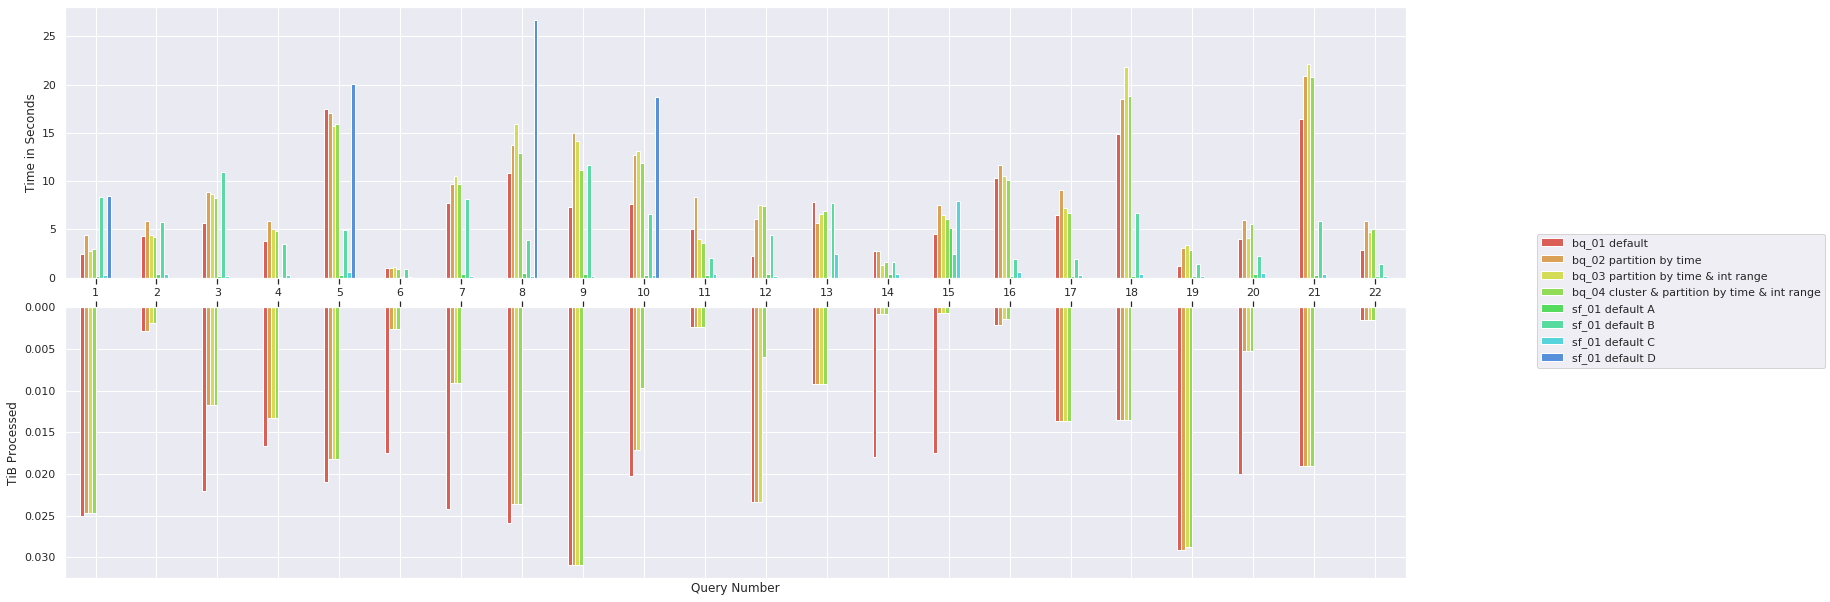

In [36]:
plot_name = "{}_{}GB_{}_comparison.png".format(test, scale_factor, x_type)

# invert bytes processed for plotting
_dfp_bp = dfp_bp.copy() * -1
color_palette = hls
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1 = dfp_dt.plot.bar(ax=ax1, legend=False, color=color_palette)
ax2 = _dfp_bp.plot.bar(ax=ax2, legend=False, color=color_palette);

# set the figure size BEFORE adjusting ticks
fig.set_size_inches(28, 10.5, forward=True)

handles, labels = ax1.get_legend_handles_labels()

ax1.set_ylabel("Time in Seconds")
ax1.set_xlabel(None)
ax1_xticklabels = ax1.get_xticklabels()
ax1.set_xticklabels(labels=[])

ax2.set_ylabel("TiB Processed")
ax2.set_xlabel("Query Number")
ticks =  ax2.get_yticks()
ticks = ["{:01.3f}".format(abs(tick)) for tick in ticks]
ax2.set_yticklabels(ticks);
ax2.xaxis.tick_top()

plt.subplots_adjust(hspace=0.11)
plt.subplots_adjust(right=0.79)

fig.legend(handles, labels, loc="right")
#fig.legend(handles, labels, loc="lower center")
plt.savefig(config.fp_plots + config.sep + plot_name, bbox_to_anchor='tight')
print();

In [19]:
dfp_dt.sum()

description
bq_01 default                                    146.489000
bq_02 partition by time                          199.327000
bq_03 partition by time & int range              191.272000
bq_04 cluster & partition by time & int range    177.795000
sf_01 default A                                   10.196106
sf_01 default B                                  104.172527
sf_01 default C                                   15.815140
dtype: float64

In [20]:
dfp_bp.sum()

description
bq_01 default                                    3.759159e-01
bq_02 partition by time                          2.745481e-01
bq_03 partition by time & int range              2.723794e-01
bq_04 cluster & partition by time & int range    2.475311e-01
sf_01 default A                                 -2.000888e-11
sf_01 default B                                 -2.000888e-11
sf_01 default C                                 -2.000888e-11
dtype: float64

In [21]:
dfp_bp.sum() * 5

description
bq_01 default                                    1.879580e+00
bq_02 partition by time                          1.372741e+00
bq_03 partition by time & int range              1.361897e+00
bq_04 cluster & partition by time & int range    1.237656e+00
sf_01 default A                                 -1.000444e-10
sf_01 default B                                 -1.000444e-10
sf_01 default C                                 -1.000444e-10
dtype: float64